# # my test

In [1]:
##################################################################################
####应用场景：
####    1.该算法用逻辑回归模型进行个人信用分类（类似蚂蚁信用或银行金融机构的风控模型的信用评分卡）
####    2.训练样本来自书籍《智能Web算法》第六章，信用分类器############################
####     样本格式：
####    label:job:carOwn:bicycle:property:retire:creditScore:age:downpayment:bankruptcy:criminalRecord:income
####    label的类型有：VG","GD","BD","EX","DN"
####
####算法过程如下
####    1,2.初始化统计数据
####    3.构建添加dummy变量后的训练样本
####    4.运用逻辑回归模型训练“DN”和'EX'两个类别标签##########
####    5.类似蚂蚁信用计算出一个信用分值（或信贷风控模型的分值）（假设最小设置为10分，最大设置为1000分）
###       分值公式推导：
###        np.log(p/(1-p))= np.sum(logreg.coef_[0]*X1.values)
###      详细算法及分析见：https://blog.csdn.net/qq_16365849/article/details/67632919
###      通过两个样本及设定范围，回归求出A、B值
###        0.9999（极坏） 概率为10分；0.0001（极好） 概率为1000分
###    信用分值计算法如下：
###         Score = Q-P*np.log(p/(1-p))
###        np.log(p/(1-p))= np.sum(logreg.coef_[0]*X1.values)
###    这样可以计算出总体分值，及每个因子的具体分值，从而可以算出哪个因子对于分类是最重要的
####################################################################################


hello

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
try:
    reload(sys)
    sys.setdefaultencoding('utf-8')
except:
    pass

x = np.arange(20)
y = x**2

plt.plot(x, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


delete


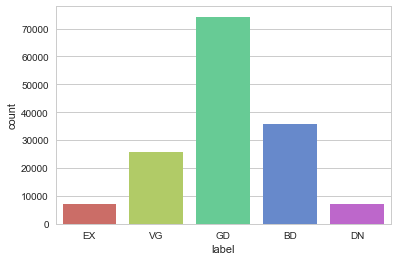

,job,carOwn,bicycle,property,retire,creditScore,age,downpayment,bankruptcy,criminalRecord,income
label,,,,,,,,,,,
BD,4.498634,0.494787,0.493895,0.000000,1.493337,2.482047,6.995317,1.502899,0.507638,0.011207,4.467189
DN,4.491709,0.000984,0.001265,0.000000,1.000984,1.508291,5.517426,1.504778,0.998735,0.997470,1.991287
EX,3.495309,1.000000,0.494329,0.998180,6.507352,6.994679,6.991738,3.992578,0.000000,0.000000,8.504831
GD,3.523471,0.986126,0.497111,0.495898,2.502472,4.474549,5.052828,2.488746,0.013497,0.000000,6.425371
VG,3.514397,1.000000,0.504409,0.922240,3.820913,5.785057,4.622981,3.351853,0.000000,0.000000,5.699376


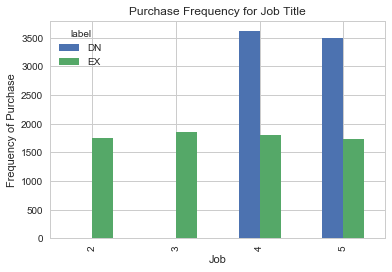

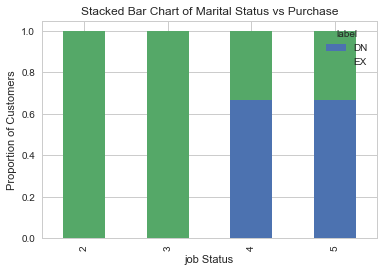

In [3]:
####################################################################################
############################训练样本见书籍《智能Web算法》第六章，信用分类器############################
########样本格式：
########label:job:carOwn:bicycle:property:retire:creditScore:age:downpayment:bankruptcy:criminalRecord:income
#####label的类型有：VG","GD","BD","EX","DN"
####################################################################################
                                            
from functools import reduce  
# with open("/data/ch06/generated-training-users.txt",'r',encoding = 'utf-8') as sw:
#     lines = sw.readlines()
#     print(len(lines))
#     line1=map(lambda x: x.split(":"),lines) 
#     print(line1[0])
#     print(line1.count() )  

df = pd.read_csv("/data/ch06/generated-training-users.txt",sep=":")  
df.head(3)
######## 1.类别样本量统计#### 
f = lambda x : x[0:2]
df['label'] = df['label'].apply(f)
df['label'].unique()
df['label'].value_counts()
print("delete")
# print(df[df['label'] == "VG"].count())
# df = df[df['label'] == "VG"].drop(axis=0)

# indexs = list(df[((df['label'] == "VG") or (df['label'] == "GD") or (df['label'] == "BD"))].index)
########丢弃"VG","GD","BD"三个类别,并统计job的计数########
indexs = list(df[df['label'].isin(["VG","GD","BD"])].index)
df2 = df.drop(indexs)
sns.countplot(x='label',data=df,palette='hls')
plt.show()
plt.savefig("label_count")

data = df2
pd.crosstab(data.job,data.label).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

table=pd.crosstab(data.job,data.label)
table.div(table.sum(1).astype(float)
          , axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('job Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

df.groupby('label').mean()

In [4]:
# cat_vars=['job','retire','age','downpayment']
########对于job','age'这种数字大小没有意义的变量，将其转换为dummy变量，并进行数据初始化########################
cat_vars=['job','age']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
# cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
data_vars
# to_keep=[i for i in data_vars if i not in cat_vars]
# data.head(2)
# data_vars
# to_keep



['label',
 'job',
 'carOwn',
 'bicycle',
 'property',
 'retire',
 'creditScore',
 'age',
 'downpayment',
 'bankruptcy',
 'criminalRecord',
 'income',
 'job_2',
 'job_3',
 'job_4',
 'job_5',
 'age_1',
 'age_2',
 'age_3',
 'age_4',
 'age_5',
 'age_6',
 'age_7',
 'age_8',
 'age_9',
 'age_10']

In [5]:
########3.构建添加dummy变量后的训练样本##########
to_keep=[i for i in data_vars if i not in cat_vars]
# to_keep

data_final=data[to_keep]
data_final.columns.values

##### 类型变量作为Y，其他变量作为X
data_final_vars=data_final.columns.values.tolist()
y=['label']
XLabel=[i for i in data_final_vars if i not in y]
print("****XLabel*****")
print(XLabel)
print(data_final.label.unique())


data_final.label.unique()
# y
data_final[0:2]





****XLabel*****
['carOwn', 'bicycle', 'property', 'retire', 'creditScore', 'downpayment', 'bankruptcy', 'criminalRecord', 'income', 'job_2', 'job_3', 'job_4', 'job_5', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8', 'age_9', 'age_10']
['EX' 'DN']


,label,carOwn,bicycle,property,retire,creditScore,downpayment,bankruptcy,criminalRecord,income,...,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10
0,EX,1,0,1,8,7,4,0,0,7,...,0,0,0,0,0,0,0,1,0,0
1,EX,1,1,1,8,8,4,0,0,7,...,1,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#####根据RFE算法（递归特征消除 Recursive feature elimination (RFE)）统计哪些变量是统计上显著########
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[XLabel], data_final[y] )

print(rfe.support_)
print(rfe.ranking_)
# X[rfe.support_]



check_X_y
['EX' 'EX' 'EX' ..., 'DN' 'DN' 'DN']


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


check_X_y
['EX' 'EX' 'EX' ..., 'DN' 'DN' 'DN']
check_X_y
['EX' 'EX' 'EX' ..., 'DN' 'DN' 'DN']
check_X_y
['EX' 'EX' 'EX' ..., 'DN' 'DN' 'DN']
check_X_y
['EX' 'EX' 'EX' ..., 'DN' 'DN' 'DN']
check_X_y
['EX' 'EX' 'EX' ..., 'DN' 'DN' 'DN']
[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True False  True  True False False False  True  True]
[1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 5 1 1 3 6 4 1 1]


In [7]:
# data_final.loc[data_final['label']=='DN','label'] = -1
# data_final.loc[data_final['label']=='EX','label'] = 1
data_final.head(10)

,label,carOwn,bicycle,property,retire,creditScore,downpayment,bankruptcy,criminalRecord,income,...,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10
0,EX,1,0,1,8,7,4,0,0,7,...,0,0,0,0,0,0,0,1,0,0
1,EX,1,1,1,8,8,4,0,0,7,...,1,0,0,0,0,0,0,0,0,0
2,EX,1,0,1,5,7,4,0,0,8,...,0,0,0,0,0,0,0,1,0,0
3,EX,1,0,1,7,6,4,0,0,10,...,0,0,0,0,0,0,0,1,0,0
4,EX,1,1,1,8,8,4,0,0,9,...,0,0,0,0,0,0,0,1,0,0
5,EX,1,1,1,7,7,4,0,0,8,...,1,0,0,0,0,0,0,0,0,0
6,EX,1,0,1,8,6,4,0,0,9,...,0,0,0,0,0,0,0,0,1,0
7,EX,1,1,1,8,7,4,0,0,7,...,1,0,0,0,0,0,0,0,0,0
8,EX,1,1,1,8,8,4,0,0,8,...,1,0,0,0,0,0,0,0,0,0
9,EX,1,1,1,6,7,4,0,0,10,...,0,0,0,0,0,0,0,1,0,0


In [8]:
cols = XLabel
# ['carOwn',
#  'bicycle',
#  'property',
#  'creditScore',
#  'bankruptcy',
#  'criminalRecord',
#  'income',
#  'job_2',
#  'job_3',
#  'job_4',
#  'job_5',
#  'retire_1',
#  'retire_2',
#  'retire_3',
#  'retire_4',
#  'retire_5',
#  'retire_6',
#  'retire_7',
#  'retire_8',
#  'age_1',
#  'age_2',
#  'age_3',
#  'age_4',
#  'age_5',
#  'age_6',
#  'age_7',
#  'age_8',
#  'age_9',
#  'age_10',
#  'downpayment_1',
#  'downpayment_2',
#  'downpayment_3',
#  'downpayment_4']
# data_final[data_final['label']=='DN']['label']=0
# data_final[data_final['label']=='EX']['label']=1
########4.运用逻辑回归模型训练“DN”和'EX'两个类别标签##########
data_final.loc[data_final['label']=='DN','label'] = float(1)
data_final.loc[data_final['label']=='EX','label'] = float(0)
# data_final.head(10)

print(data_final.label.unique())
print("data:")
X=data_final[XLabel]
y=data_final['label']
# print(X[0:1])
# print("label:")
# print(y)
# print("unique:")
# print(y)
# print("ytest:")
# print(X.values)
# print(list(X.values))
# print(y.values)
# print(list(y.values))


#构建训练样本
X_train, X_test, y_train, y_test = train_test_split(X, list(y.values), test_size=0.3, random_state=0)
# print(X_train[0:2])
# print("ytrain:")
# print(y_train)


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_pro = logreg.predict_proba(X_test)
y_pred_logpro = logreg.predict_log_proba(X_test)
print("logreg pro:")
print(logreg.classes_)
#看看前两个样本的训练结构及相关餐宿
print(y_pred[0:1])
print(y_pred_pro[0:1])
print(y_pred_logpro[0:1])
print("logreg parameter:")
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.n_iter_)

# print(y_pred[0:2])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)







[0.0 1.0]
data:
check_X_y
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
###5.查看统计结构#########  
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



check_X_y
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,

check_X_y
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,

check_X_y
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,

10-fold cross validation average accuracy: 1.000
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2104
        1.0       1.00      1.00      1.00      2174

avg / total       1.00      1.00      1.00      4278



In [10]:
1000.0
10.0
#############################
###5.类似蚂蚁信用计算出一个信用分值（或信贷风控模型的分值）（假设最小设置为10分，最大设置为1000分）
###分值公式推导：
###  np.log(p/(1-p))= np.sum(logreg.coef_[0]*X1.values)
### 详细算法见：
###  https://blog.csdn.net/qq_16365849/article/details/67632919

###通过两个样本及分枝范围，回归求出A、B值
###0.9999（极坏） 概率为10分
###0.0001（极好） 概率为1000分
###分值计算法如下：
# Score = Q-P*np.log(p/(1-p))
# np.log(p/(1-p))= np.sum(logreg.coef_[0]*X1.values)
# 这样可以计算出总体分值，及每个因子的具体分值，从而可以算出哪个因子对于分类是最重要的
#############################

print("****Credit Score Line*****")
p0 = 0.9999
p01 =p0/(1-p0)
C01 = np.log(p01)
# 最小设置为10分
A=10
###0.0001（极好） 概率为1000分
p1 = 0.0001
p11 =p1/(1-p1)
C11 = np.log(p11)
# 最大设置为1000分
B=1000
P=(B-A)/(C01-C11)
Q=A+C01*P
print("P:",P)
print("Q:",Q)
print(Q-P*C11)
print(Q-P*C01)

###分值计算法如下：
# Score = Q-P*np.log(p/(1-p))
# np.log(p/(1-p))= np.sum(logreg.coef_[0]*X1.values)
# 这样可以计算出总体分值，及每个因子的具体分值，从而可以算出哪个因子对于分类是最重要的

def scrore(model, X):
#     print(XLabel)
    Q=505.0
    P = 53.7445256885
#     X1 = X_test[0:1]
#     print(X1.values)
#     print(model.coef_[0])
    Log = np.sum(model.coef_[0]*X.values)
    y_pred = model.predict(X)
    y_pred_pro = model.predict_proba(X)
    y_pred_logpro = logreg.predict_log_proba(X)
   
    # np.log(p/(1-p))= np.sum(logreg.coef_[0]*X1.values)
    Score = Q-P*Log
    print("Log---",Score,Log,y_pred,y_pred_pro,y_pred_logpro)
#     print(Score)
    return Score,y_pred[0]
    

print("****XLabel*****")
print(XLabel)
print(logreg.classes_)
print(logreg.coef_)
X1 = X_test[0:1]
# print(X1.values)
# print(logreg.coef_[0])
# Log = np.sum(logreg.coef_[0]*X1.values)
# print(Log)
# # np.log(p/(1-p))= np.sum(logreg.coef_[0]*X1.values)
# Score = Q-P*Log
# print("****Current Score*****",Score)
print("****Current Score*****",scrore(logreg,X_test[0:1]))
print("****Current Score*****",scrore(logreg,X_test[1:2]))
print("****Current Score*****",scrore(logreg,X_test[2:3]))
print("****Current Score*****",scrore(logreg,X_test[200:201]))
print("****Current Score*****",scrore(logreg,X_test[500:501]))
print("****Current Score*****",scrore(logreg,X_test[1000:1001]))
print("****Current Score*****",scrore(logreg,X_test[-2:-1]))
print("****Current Score*****",scrore(logreg,X_test[-3:-2]))
print("****Current Score*****",scrore(logreg,X_test[-4:-3]))

sp = 0.999950488
print(np.log((1-sp)/sp))
base= 4.95116389
index =5
sp2 =base*1/np.power(10,index)
print(np.log(sp2/(1-sp2)))


# 测试分值范围
# print(data_final[0:1])
# X=data_final[XLabel]
# y=data_final['label']
# indexs = list(df[df['label'].isin(["VG","GD","BD"])].index)

# nData = data_final[data_final['label']==0]
# nData = nData.drop(['label'],axis=1)
# print(len(nData))
# index = list(nData.index)
# # print("index",data_final[data_final['label']==0].index)
# # data_final.loc[data_final['label']=='EX','label'] = float(0)
# # for x in indexs:
# Scores = []
# for i in range(len(index)):
#     s,cls = scrore(logreg,nData[index[i]:index[i]+1])
#     Scores.append(s)
# print(len(Scores),np.max(Scores),np.min(Scores))


# nData2 = data_final[data_final['label']==1]
# print(nData2[0:1])
# nData2 = nData2.drop(['label'],axis=1)

# print(len(nData2))
# print("****Current Score*****",scrore(logreg,nData2[0:1]))
# print("****Current Score*****",scrore(logreg,nData2[95000:95001]))

# index2 = list(nData2.index)
# # print("index",data_final[data_final['label']==0].index)
# # data_final.loc[data_final['label']=='EX','label'] = float(0)
# # for x in indexs:
# Scores2 = []
# for j in range(len(index2)):
#     s,cls = scrore(logreg,nData2[j:j+1])
#     Scores2.append(s)
# print(len(Scores2),np.max(Scores2),np.min(Scores2))





****Credit Score Line*****
P: 53.7445256885
Q: 505.0
1000.0
10.0
****XLabel*****
['carOwn', 'bicycle', 'property', 'retire', 'creditScore', 'downpayment', 'bankruptcy', 'criminalRecord', 'income', 'job_2', 'job_3', 'job_4', 'job_5', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8', 'age_9', 'age_10']
[ 0.  1.]
[[-0.36458472  0.4825113  -1.06119045 -1.00783796 -0.45768664 -0.17623977
   2.73328799  2.52069145 -0.19917455 -0.16967534 -0.15394341  1.4146624
   1.42466263  0.91301944  0.6494114  -0.04016055 -0.19166745 -0.26865172
  -0.03010678 -0.02941124 -0.15688965  0.8596355   0.81052733]]
Log--- 216.644064262 5.36530803916 [ 1.] [[  3.77706887e-04   9.99622293e-01]] [[ -7.88139209e+00  -3.77778236e-04]]
****Current Score***** (216.64406426247484, 1.0)
Log--- 245.343929499 4.83130267083 [ 1.] [[  6.44102130e-04   9.99355898e-01]] [[ -7.34765326e+00  -6.44309653e-04]]
****Current Score***** (245.34392949882346, 1.0)
Log--- 209.503778871 5.49816408914 [ 1.] [[  3.30

In [11]:

###############查看训练出的模型对其他label（BD，GD，VG）的效果如何########
#     print(line1.count() )  
df = pd.read_csv("/data/ch06/generated-training-users.txt",sep=":")  
df.head(3)
f = lambda x : x[0:2]
df['label'] = df['label'].apply(f)
df['label'].unique()
df['label'].value_counts()
print("delete")
# print(df[df['label'] == "VG"].count())
# df = df[df['label'] == "VG"].drop(axis=0)

# indexs = list(df[((df['label'] == "VG") or (df['label'] == "GD") or (df['label'] == "BD"))].index)
# indexs = list(df[df['label'].isin(["VG","GD","BD"])].index)
# df2 = df.drop(indexs)
data = df
cat_vars=['job','age']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
# cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()

to_keep=[i for i in data_vars if i not in cat_vars]
# to_keep

all_data_final=data[to_keep]
all_data_final.columns.values

all_data_final_vars=all_data_final.columns.values.tolist()
y=['label']
XLabel=[i for i in all_data_final_vars if i not in y]
print("****XLabel*****")
print(XLabel)
print(all_data_final.label.unique())

def retScoreSta(nData2,logreg,tcls):  
#     print(nData2[0:1])
    nData2 = nData2.drop(['label'],axis=1)
#     print(len(nData2))
#     print("****Current Score*****",scrore(logreg,nData2[0:1]))
#     print("****Current Score*****",scrore(logreg,nData2[95000:95001]))

    index2 = list(nData2.index)
    # print("index",data_final[data_final['label']==0].index)
    # data_final.loc[data_final['label']=='EX','label'] = float(0)
    # for x in indexs:
    Scores2 = []
    count =0
    for j in range(len(index2)):
        if(j>10):
            break
        s,cls = scrore(logreg,nData2[j:j+1])
        if(tcls!=cls):
            count=count+1
#             print(s," ",cls)
            continue
        Scores2.append(s)
    print(len(Scores2),count,np.max(Scores2),np.min(Scores2))

print("****BD****")
print("*********retScoreSta*******")
nData2 = all_data_final[all_data_final['label']=='DN']
print(len(nData2),"DN")
retScoreSta(nData2,logreg,1)

print("*********retScoreSta*******")
nData2 = all_data_final[all_data_final['label']=='BD']
print(len(nData2),"BD")
retScoreSta(nData2,logreg,1)

print("*********retScoreSta*******")
nData2 = all_data_final[all_data_final['label']=='GD']
print(len(nData2),"GD")
retScoreSta(nData2,logreg,0)

print("*********retScoreSta*******")
nData2 = all_data_final[all_data_final['label']=='VG']
print(len(nData2),"VG")
retScoreSta(nData2,logreg,0)

print("*********retScoreSta*******")
nData2 = all_data_final[all_data_final['label']=='EX']
print(len(nData2),"EX")
retScoreSta(nData2,logreg,0)



delete
****XLabel*****
['carOwn', 'bicycle', 'property', 'retire', 'creditScore', 'downpayment', 'bankruptcy', 'criminalRecord', 'income', 'job_2', 'job_3', 'job_4', 'job_5', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8', 'age_9', 'age_10']
['EX' 'VG' 'GD' 'BD' 'DN']
****BD****
*********retScoreSta*******
7116 DN
Log--- 230.274096319 5.11170021805 [ 1.] [[  4.86685079e-04   9.99513315e-01]] [[ -7.62789330e+00  -4.86803549e-04]]
Log--- 226.811148522 5.17613371621 [ 1.] [[  4.56329041e-04   9.99543671e-01]] [[ -7.69229643e+00  -4.56433191e-04]]
Log--- 210.910455039 5.47199070405 [ 1.] [[  3.39500024e-04   9.99660500e-01]] [[ -7.98803654e+00  -3.39557668e-04]]
Log--- 210.635089221 5.47711431087 [ 1.] [[  3.37765594e-04   9.99662234e-01]] [[ -7.99315841e+00  -3.37822650e-04]]
Log--- 254.872247795 4.65401357628 [ 1.] [[  7.68946551e-04   9.99231053e-01]] [[ -7.17048910e+00  -7.69242342e-04]]
Log--- 210.635089221 5.47711431087 [ 1.] [[  3.37765594e-04   9.99662234e-0

In [12]:

# import statsmodels.api as sm
# logit_model=sm.Logit(list(y.values),X)
# result=logit_model.fit()
# print(result.summary())

In [13]:
from sklearn.utils.multiclass import *
from sklearn.utils.validation import *
print(type_of_target([1.0, 1.0, 1.0, -1.0, -1.0, -1.0]))
# print(type_of_target([1.0 1.0 1.0 -1.0  -1.0 -1.0]))
# print(y)
# X1, y1 = check_X_y(X, y, accept_sparse='csr', dtype=np.float64,order="C")
# print(y1)
# print(type_of_target(y1))

binary


In [14]:
# y_train[0:2]
# y[0:2]
# data_final[0:2]
# y.unique()

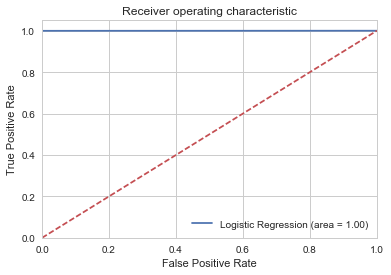

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# print(y_test[0:-1])
# print(X_test[0:-1])


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



In [16]:

# print(X_test[0:-1])